Выполнил студент группы РК6-63б, Димитровска Т. Д. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.optimize as scopt

numberOfNodes = 150
num = 40

In [2]:
# исходные данные
sourceData = open("lab1.csv")
num = 40
points = [0] * num
i = 0

for str in sourceData:
    points[i] = [0] * 2
    x_str, y_str = str.strip().split(' ')
    points[i][0] = float(x_str)
    points[i][1] = float(y_str)
    i += 1
    

In [3]:
points = sorted(points, key = lambda point: point[0])

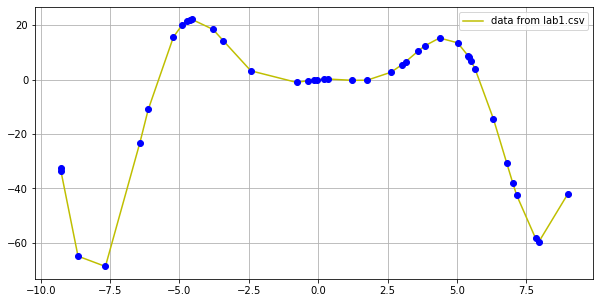

In [4]:
X = [0] * 40
Y = [0] * 40

for i in range(num):
    X[i] = points[i][0]
    Y[i] = points[i][1]
    
fig, axes1 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes1.plot(X, Y, 'y', label='data from lab1.csv')
axes1.plot(X, Y, 'ob')
axes1.legend()
axes1.grid()
plt.show()

Diff(nodesByY, nodesByYApr) - функция определения максимального расстояния между имеющимися точками и точками аппромизации;
maxDiff(nodesByY, nodesByYApr) - функция определения максимального расстояния между имеющимися точками и точками квадратичного отклонения.

In [5]:
# среднеквадратичное отклонение
def Diff(nodesByY, nodesByYApr):
    result = 0
    for i in range(len(nodesByY)):
        result += (nodesByY[i] - nodesByYApr[i]) ** 2
    result /= len(nodesByY)
    result = math.sqrt(result)
    return result

# максимальное отклонение
def maxDiff(nodesByY, nodesByYApr):
    maxDist = 0
    for i in range(len(nodesByY)):
        if (abs(nodesByY[i]-nodesByYApr[i]) > maxDist):
            maxDist = abs(nodesByY[i]-nodesByYApr[i])
    return maxDist

# точки для построения графика
massX = np.linspace(points[0][0], points[num - 1][0], numberOfNodes)

Рассматривая кусочно-линейную аппроксимацию функции, можно сделать вывод, что функция приближенно четная. Если взять за основание, что заданные точки описываются произведением тригонометрической функции и некоторого полинома, то можно сделать вывод, что этот полином имеет 2-3 степень. 
        Также следует обратить внимание, что левые экстремумы больше по модулю, чем правые, что говорит о том, что требуется корректирующая функция. С учетом четности следует вывод, что мы имеем дело с произведением полинома 2 степени и косинуса и корректирующей функцией в виде произведения другого полинома 2 степени на синус или произведением полинома 3 степени и синуса и корректирующей функцией в виде произведения другого полинома 3 степени на косинус. Обобщая данный вывод берем в качестве начальной функции следующую функцию:

In [6]:
def functionApr(x, a, b, c, d, f, g, l, m, n, o, p):
    result = [0] * (len(x))
    for i in range(len(x)):
        result[i] = math.cos(a * (x[i] - p)) * (b * (x[i] ** 3) + c * (x[i] ** 2) + d * x[i] + f)
        result[i] += math.sin(g * (x[i] - p)) * (l * (x[i] ** 3) + m * (x[i] ** 2) + n * x[i] + o)
    return result

Некоторые параметры достаточно малы, чтобы их возможно было обнулить без значимых потерь. Тогда: 

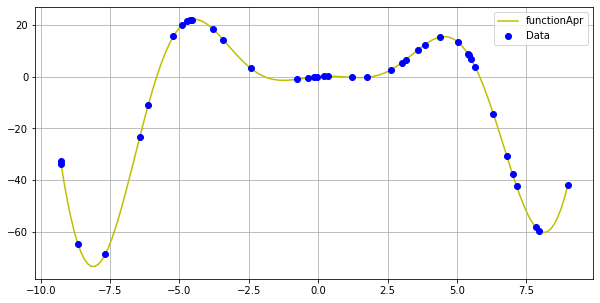

In [7]:
mass = scopt.curve_fit(functionApr, X, Y)[0]
#print(mass)

massY = functionApr(massX, mass[0], 0, mass[2], mass[3], 0, mass[5], 0, mass[7], mass[8], 0, mass[10])

fig, axes2 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes2.plot(massX, massY,'y', label = 'functionApr')
axes2.plot(X, Y, 'ob', label='Data')
axes2.legend()
axes2.grid()
plt.show()

In [8]:
massY_= functionApr(X, mass[0], 0, mass[2], mass[3], 0, mass[5], 0, mass[7], mass[8], 0, mass[10])

print('Сред отклонение = {}'.format(Diff(Y, massY_)))
print('Макс отклонение = {}'.format(maxDiff(Y, massY_)))

Сред отклонение = 0.004990845378083255
Макс отклонение = 0.01577915016581244


Переходим ко второй итерации, исключая из корректирующей функции обнулившиеся переменные :

In [9]:
def functionApr2(x, a, c, d, g, m, n, p):
    result = [0] * (len(x))
    for i in range(len(x)):
        result[i] = math.cos(a * (x[i] - p)) * (c * (x[i] ** 2) + d * x[i])
        result[i] += math.sin(g * (x[i] - p)) * (m * (x[i] ** 2) + n * x[i])
    return result

Некоторые параметры здесь также достаточно малы, чтобы их возможно было обнулить без значимых потерь. Тогда: 


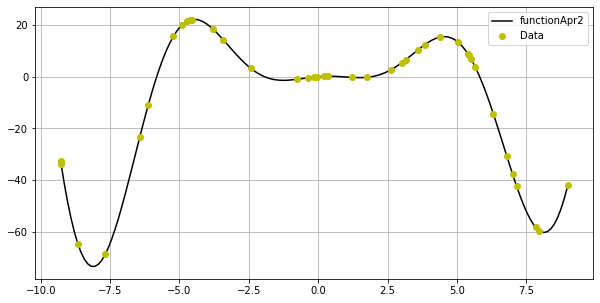

In [10]:
mass = scopt.curve_fit(functionApr2, X, Y)[0]
#print(mass)

massY = functionApr2(massX, mass[0], 0, 0, mass[3], mass[4], mass[5], mass[6])

fig, axes3 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes3.plot(massX, massY, 'black', label ='functionApr2')
axes3.plot(X, Y, 'oy', label='Data')
axes3.legend()
axes3.grid()
plt.show()

In [11]:
massY_ = functionApr2(X, mass[0], 0, 0, mass[3], mass[4], mass[5], mass[6])
print('Сред отклонение = {}'.format(Diff(Y, massY_)))
print('Макс отклонение = {}'.format(maxDiff(Y, massY_)))

Сред отклонение = 2.254532754784407e-08
Макс отклонение = 8.877359647385674e-08


Переходим ко второй итерации, исключая из корректирующей функции обнулившиеся переменные (то есть, косинус, так как полином, на который он умножается, обращается в ноль): 

In [12]:
def functionApr3(x, g, l, n, p):
    result = [0] * (len(x))
    for i in range(len(x)):
        result[i] = math.sin(g * (x[i] - p)) * (l * (x[i] ** 2) + n * x[i])
    return result

[ 0.81        1.06       -0.85        1.93925472]


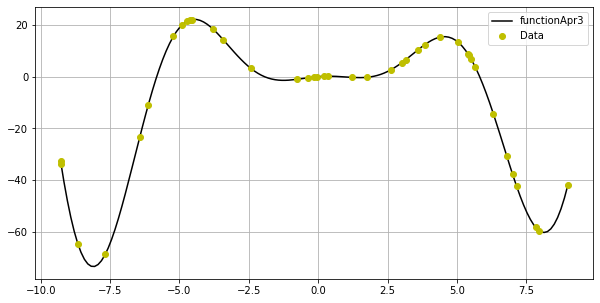

In [13]:
mass = scopt.curve_fit(functionApr3, X, Y)[0]
print(mass)

massY = functionApr3(massX, mass[0], mass[1], mass[2], mass[3])

fig, axes4 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes4.plot(massX, massY,'black', label ='functionApr3')
axes4.plot(X, Y, 'oy', label='Data')
axes4.legend()
axes4.grid()
plt.show()

In [14]:
mass_ = functionApr3(X, mass[0], mass[1], mass[2], mass[3])

print('Сред отклонение = {}'.format(Diff(Y, mass_)))
print('Макс отклонение = {}'.format(maxDiff(Y, mass_)))

Сред отклонение = 2.2651328942561706e-14
Макс отклонение = 9.237055564881302e-14


По формуле приведения получим формулу: cos(0.81x)(-1.06(x^2)+0.85x)

Протестируем полученный результат.

In [15]:
def Function(X):
    result = [0] * (len(X))
    for i in range(len(X)):
        result[i] = math.cos(0.81 * X[i]) * (-1.06 * (X[i] ** 2) + 0.85 * X[i])
    return result

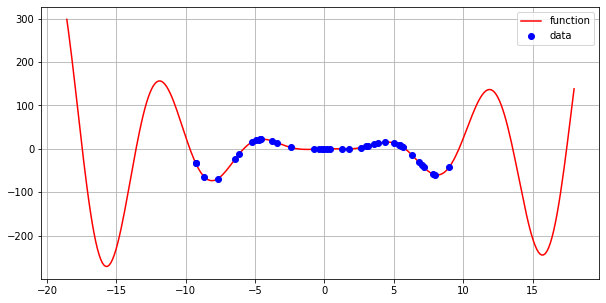

In [16]:
massX = np.linspace(2 * points[0][0], 2*points[num - 1][0], 2 * numberOfNodes)
massY = Function(massX)

fig, axes5 = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
axes5.plot(massX, massY, color = 'r', label ="function")
axes5.plot(X, Y, 'ob', label='data')
axes5.legend()
axes5.grid()
plt.show()

In [17]:
mass_ = Function(X)

print('Сред отклонение = {}'.format(Diff(Y, mass_)))
print('Макс отклонение = {}'.format(maxDiff(Y, mass_)))

Сред отклонение = 1.4407256008216093e-15
Макс отклонение = 7.105427357601002e-15


f(x) = cos(0.81x) * (-1.06(x^2)+0.85x)